O pré-processamento de dados é um conjunto de atividades que envolvem preparação, organização e estruturação dos dados. Trata-se de uma etapa fundamental que precede a realização de análises e predições.

O [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) permite aplicar, de forma sequencial, uma lista de transformações para o preprocessamento os dados e, se for necessário, concluir a sequência com um modelo final para previsão.

Introduzido neste notebook, o PCA (Análise de Componentes Principais) é uma das técnicas mais populares de redução de dimensionalidade. Ele funciona encontrando novas variáveis (componentes principais) que são combinações lineares das variáveis originais, mas que retêm a maior variância possível dos dados.

O PCA centraliza os dados subtraindo a média para cada variável, além disso, ela calcula a matriz de covariância para entender as relações entre as variáveis, encontra os autovalores e autovetores, que indicam as direções de maior variação nos dados, e por fim, projeta os dados em um novo espaço de menor dimensão, mantendo apenas os componentes mais relevantes.

O PCA faz parte da redução de dimensionalidade, que é uma técnica usada em aprendizado de máquina e análise de dados para diminuir o número de variáveis (ou features) em um conjunto de dados, preservando ao máximo as informações relevantes.

Ela é útil porque, melhora a eficiência dos algoritmos, feduz o risco de overfitting e facilita a visualização de seus dados.

O que será feito neste modelo?

- Utilização do `StandardScaler` para normalizar os dados

- Utilização do `OneHotEncoder` para separar as variáveis categóricas do dataset.

- Inserção do `PCA` para reduzir a dimensionalidade do modelo em um número baixo de componentes

- Utilização do `KMeans` para determinar quantos clusters serão utilizados no modelo.

In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import pandas as pd

DADOS = "../dados/Mall_Customers_no_CustomerID.csv"

df = pd.read_csv(DADOS)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessing = ColumnTransformer(
    [
        ("standard", StandardScaler(), ["Age", "Annual Income (k$)", "Spending Score (1-100)"]),
        ("onehot", OneHotEncoder(), ["Gender"])
    ]
)

In [4]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
RANDOM_STATE = 42

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("pca", PCA(n_components=3, random_state=RANDOM_STATE)),
        ("clustering", KMeans(n_clusters=5, random_state=RANDOM_STATE, n_init=10))
    ]
)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('pca', PCA(n_components=3, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=5, n_init=10, random_state=42))])

In [5]:
import joblib

joblib.dump(pipeline, "../modelos/pipeline_preprocessing_pca_clustering.pkl")

['../modelos/pipeline_preprocessing_pca_clustering.pkl']

In [6]:
pipeline.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2', 'kmeans3', 'kmeans4'],
      dtype=object)

In [7]:
pipeline["clustering"].labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 0, 3, 1, 3,
       0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 1,
       0, 3, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 4, 1, 4, 2, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

In [8]:
df_clustered = df.copy()
df_clustered["cluster"] = pipeline["clustering"].labels_

df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,1
1,Male,21,15,81,3
2,Female,20,16,6,1
3,Female,23,16,77,3
4,Female,31,17,40,1


O Que Cada Gráfico Representa?

1. Diagonais: Histogramas e Densidades Kernel (KDE)
   
As diagonais do pairplot exibem as distribuições individuais das três variáveis analisadas: Idade, Renda Anual e Pontuação de Gastos.

Cada curva representa a distribuição dos valores de uma variável para os clientes pertencentes a um mesmo cluster.

Podemos ver que alguns clusters possuem distribuições bem definidas, como o cluster laranja e o cluster verde.

2. Gráficos de Dispersão (Scatter Plots) nas Outras Células
   
Os gráficos fora da diagonal mostram as relações entre duas variáveis ao mesmo tempo.

Cada ponto representa um cliente e sua posição no gráfico indica os valores dessas duas variáveis.

A segmentação por cor revela que os clusters apresentam padrões distintos.

- Cluster Azul (0): Clientes com renda média e pontuação de gastos alta, indicando um grupo de consumidores que gastam bastante.
  
- Cluster Laranja (1): Clientes com renda baixa e baixa pontuação de gastos, o que pode indicar um perfil de consumo mais conservador.

- Cluster Verde (2): Clientes de idade mais avançada e gastos médios, possivelmente clientes mais cautelosos.

- Cluster Vermelho (3): Clientes mais jovens, com renda baixa e alta pontuação de gastos, podendo representar consumidores impulsivos ou com alta recorrência de compras.

- Cluster Roxo (4): Clientes com renda alta e pontuação de gastos baixa, indicando consumidores que não gastam muito, apesar da renda elevada.

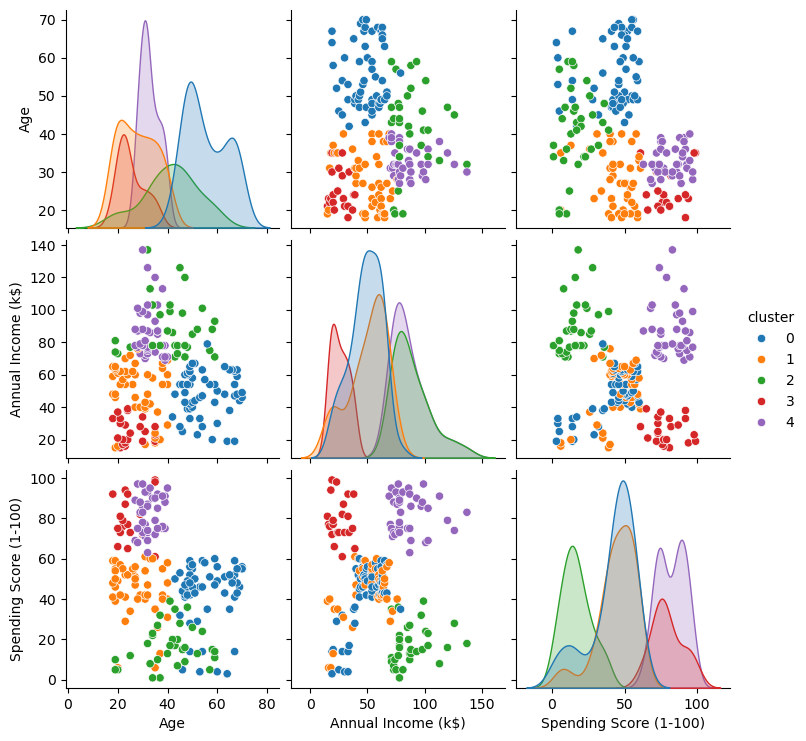

In [9]:
import seaborn as sns

sns.pairplot(df_clustered, diag_kind="kde", hue="cluster", palette="tab10");

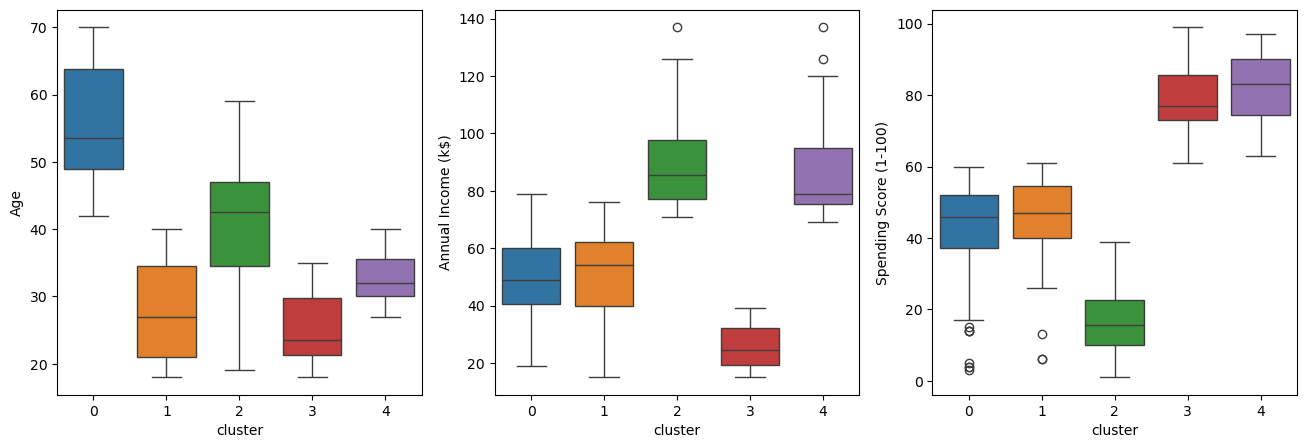

In [10]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

for ax, coluna in zip(axs, df_clustered.select_dtypes("number")):
    sns.boxplot(data=df_clustered, x="cluster", y=coluna, ax=ax, palette="tab10")

plt.show()

- Cluster 0 - pontuação de gastos moderada, renda moderada, idade alta, o gênero feminino tem maior pontuação de gastos, enquanto o masculino tem a maior idade e renda anual.
- Cluster 1 - pontuação de gastos moderada, renda moderada, idade jovem, o gênero feminino tem a maior renda anual e a maior idade, enquanto o masculino tem maior pontuação de gastos.
- Cluster 2 - pontuação de gastos baixa, renda alta, idade moderada, o gênero feminino tem maior pontuação de gastos, nota-se que os boxplots de idade entre ambos dos gêneros estão praticamente iguais, sendo que o masculino leva uma ligeira vantagem.
- Cluster 3 - pontuação de gastos alta, renda baixa, idade jovem, o gênero feminino tem maior pontuação de gastos, a maior idade e renda anual.
- Cluster 4 - pontuação de gastos alta, renda alta, idade jovem, o gênero feminino tem a maior renda anual, enquanto o masculino tem a maior idade e pontuação de gastos.

- Nota-se que em quatro dos cinco clusters, a predominância do gênero é feminina, somente no 3, que o masculino é maior que o feminino.

Siglas:
- MIG - Maior Idade por Gênero
- MRG - Maior Renda por Gênero
- MPG - Maior Pontuação por Gênero

Transformando os pontos acima em uma tabela

| Pontuação de Gastos | Renda | Idade | Cluster |  Gênero |   MIG   |   MRG   |   MPG   |
|---------------------|-------|-------|---------|---------|---------|---------|---------|
| Moderada            | Moderada | Alta | 0     | Feminino| Masculino| Masculino| Feminino |
| Moderada            | Moderada | Jovem | 1       | Feminino| Feminino| Feminino | Masculino|
| Baixa               | Alta  | Moderada | 2       | Masculino| Masculino| Feminino | Feminino |
| Alta                | Baixa | Jovem | 3       | Feminino| Feminino | Feminino | Feminino |
| Alta                | Alta  | Jovem | 4       | Feminino| Masculino| Feminino | Masculino|


In [11]:
df_clustered["cluster"].value_counts().sort_index()

cluster
0    58
1    47
2    34
3    22
4    39
Name: count, dtype: int64

In [12]:
df_clustered.groupby(["cluster", "Gender"]).size()

cluster  Gender
0        Female    33
         Male      25
1        Female    31
         Male      16
2        Female    14
         Male      20
3        Female    13
         Male       9
4        Female    21
         Male      18
dtype: int64

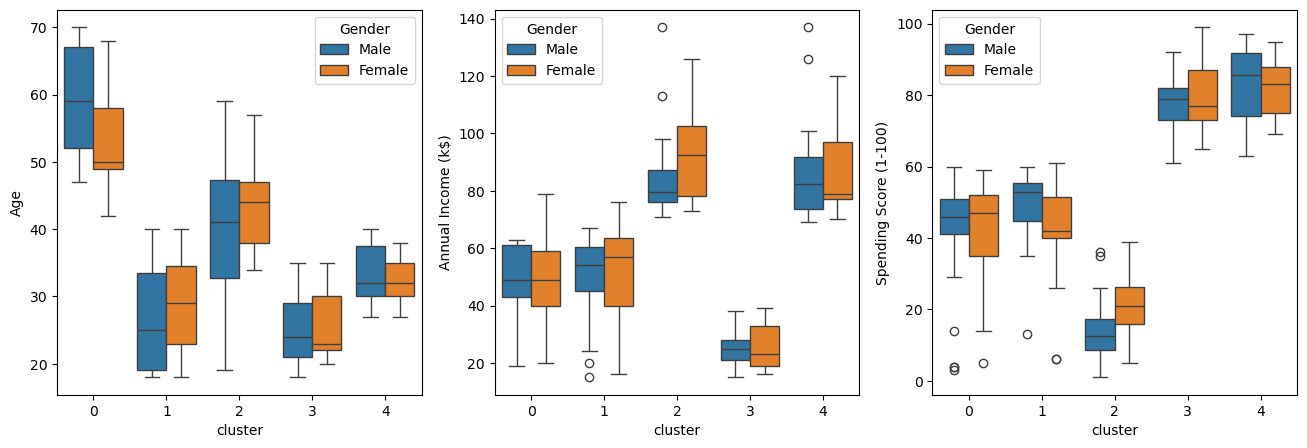

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

for ax, coluna in zip(axs, df_clustered.select_dtypes("number")):
    sns.boxplot(data=df_clustered, x="cluster", y=coluna, ax=ax, hue="Gender", palette="tab10")

plt.show()

In [14]:
pipeline["preprocessing"].get_feature_names_out()

array(['standard__Age', 'standard__Annual Income (k$)',
       'standard__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [15]:
pipeline["pca"].components_

array([[ 0.70508424, -0.03921531, -0.70473508, -0.04830549,  0.04830549],
       [ 0.02024387,  0.996115  , -0.02730038, -0.05744471,  0.05744471],
       [ 0.70661643,  0.00434967,  0.70753413, -0.00590595,  0.00590595]])

In [16]:
pipeline["pca"].get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [17]:
centroids = pipeline["clustering"].cluster_centers_
centroids

array([[ 1.09281997, -0.42702742,  0.61346816],
       [-0.39283157, -0.42287385, -0.70807382],
       [ 1.00944112,  1.11828568, -0.78954352],
       [-1.4357643 , -1.37856558,  0.10638215],
       [-1.2219143 ,  0.94742028,  0.56929202]])

In [18]:
pipeline[:-1]

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('pca', PCA(n_components=3, random_state=42))])

In [19]:
df_pca = pd.DataFrame(
    pipeline[:-1].fit_transform(df),
    columns=pipeline[:-1].get_feature_names_out()
)

df_pca.head()

,pca0,pca1,pca2
0,-0.575724,-1.684874,-1.315210
1,-1.623595,-1.726481,-0.060149
2,0.279614,-1.725314,-2.182574
3,-1.511064,-1.796205,-0.080242
4,-0.095468,-1.707347,-0.690684


O `ipympl` é uma ferramenta do Matplotlib que faz com que os seus gráficos fiquem interativos, alterando o seu respectivo zoom e o formato de visualização, sendo 2D ou 3D. Tudo que você precisa fazer, é colocar o comando `% matplotlib ipympl` para ativar a interatividade com o gráfico.

Antes de executar o código, caso você não tenha instalado o `ipympl` em seu ambiente virtual, consulte a [documentação](https://matplotlib.org/ipympl/) para utilizar em seu IDE.

Nos gráficos abaixo, as bolas maiores representa a identificação de cada centróide, e cada ponto colorido representa um cliente, enquanto as cores indicam diferentes clusters identificados pelo modelo. Esses grupos foram encontrados com base na similaridade dos dados, permitindo uma melhor compreensão dos padrões de comportamento dos clientes.

Embora a visualização tridimensional seja útil para identificar padrões visuais, a visualização em 3D pode ser afetada por pontos sobrepostos, o que dificulta a identificação precisa dos agrupamentos, além disso, a base original poderia conter mais variáveis relevantes para a segmentação. Porém, ao escolher apenas três colunas, perdemos informações que poderiam influenciar na separação dos clusters.

Durante o processo de seleção das variáveis para o gráfico, foi realizado o slice do Pipeline para pegar os valores de cada ponto da coluna do PCA, que obtemos este gráfico abaixo.

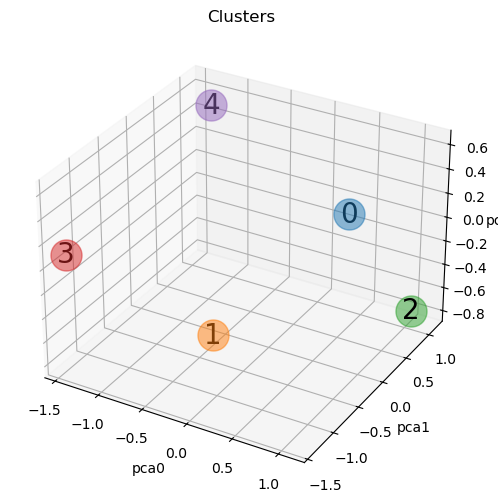

In [20]:
# %matplotlib ipympl # Descomente para interagir com o gráfico
from funcoes_auxiliares import visualizar_clusters

visualizar_clusters(
    dataframe=df_pca,
    colunas=['pca0', 'pca1','pca2'],
    quantidade_cores=5,
    centroids=centroids,
    
)

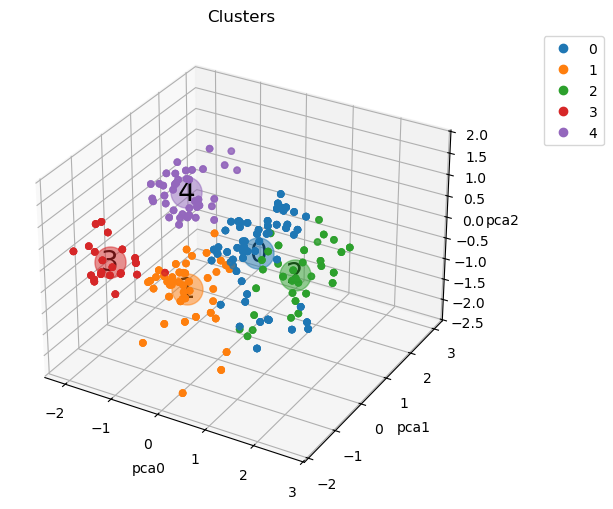

In [21]:

from funcoes_auxiliares import visualizar_clusters

visualizar_clusters(
    dataframe=df_pca,
    colunas=['pca0', 'pca1','pca2'],
    quantidade_cores=5,
    centroids=centroids,
    mostrar_pontos=True,
    coluna_clusters=df_clustered['cluster']
)

### Objetivo:

Este projeto teve como objetivo realizar a segmentação de clientes a partir de dados de consumo e perfil financeiro, utilizando técnicas de clustering. A análise permitiu identificar padrões de comportamento entre os clientes e agrupar perfis semelhantes, fornecendo insights valiosos para estratégias de marketing e tomada de decisão empresarial.

### Metodologia:

#### 1. Coleta e Pré-processamento dos Dados:

Os dados passaram por uma limpeza inicial e tratamento de variáveis categóricas.

Foi aplicada normalização nos dados utilizando StandardScaler para padronizar as variáveis numéricas e evitar viés devido a diferentes escalas.

A seleção de variáveis foi feita considerando as mais relevantes para a segmentação. As variáveis onehot__Gender_Female e onehot__Gender_Male foram descartadas, pois não agregavam valor à visualização dos clusters.

#### 2. Escolha do Número de Clusters:

O método do cotovelo e a análise de silhueta foram utilizados para determinar a quantidade ideal de clusters.

A partir dos resultados, foi decidido um número adequado para a segmentação.

#### 3. Aplicação do Algoritmo de Clustering:

O algoritmo K-Means foi utilizado para realizar a segmentação dos clientes.

O agrupamento foi visualizado em gráficos tridimensionais e em pares de variáveis para análise da distribuição dos clusters.

#### 4. Interpretação dos Clusters:

Foram identificados grupos distintos de clientes com base nas variáveis Idade, Renda Anual e Score de Gastos.

A análise revelou perfis de clientes como "Clientes de Alto Poder Aquisitivo com Baixo Consumo", "Jovens Gastadores", entre outros, permitindo estratégias personalizadas para cada grupo.

#### Resultados e Conclusões:

A segmentação demonstrou que diferentes perfis de clientes possuem padrões claros de comportamento financeiro e de consumo.

A empresa pode utilizar esses insights para otimizar campanhas de marketing, afim de elevar os seus índices de faturamento e aprimorar a experiência do cliente. As possibilidades variam como: oferecer promoções personalizadas para cada um de seus grupos de clientes, maiores vantagens em seu cartão de fidelidade e etc.

A análise gráfica permitiu visualizar os clusters de forma intuitiva, destacando como a segmentação pode auxiliar nas decisões estratégicas não somente em segmentação de clientes de um supermercado, como também em outros setores de serviços, como lojas de roupas, acessórios e etc.